In [5]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.model_selection import train_test_split
import geopandas as gpd

In [6]:
zips = gpd.read_file('C:\\Users\\86746\\Desktop\\NYU\\PUI\\数据\\ZIP_CODE_040114.shp')
zips=zips.to_crs(epsg=4326)
BK=zips[zips['COUNTY']=='Kings']
Q=zips[zips['COUNTY']=='Queens']

In [7]:
df1=pd.read_csv('BK.csv') 

In [8]:
list(df1.columns)

['Unnamed: 0',
 'BOROUGH',
 'ZIP CODE',
 'ADDRESS',
 'avg price',
 'YEAR BUILT',
 'detail_addr',
 'lat_x',
 'long',
 'geometry',
 'index_right',
 'ZIPCODE',
 'grocery distance < 100 numbers',
 'grocery distance < 200 numbers',
 'grocery distance < 300 numbers',
 'grocery distance < 400 numbers',
 'grocery distance < 500 numbers',
 'closest_hospital_name',
 'hospital_distance',
 'hospital_lat',
 'hospital_long',
 'closest_library_name',
 'library_distance',
 'library_lat',
 'library_long',
 'mall1_addr',
 'mall1_lat',
 'mall1_lng',
 'mall1_dist',
 'mall2_addr',
 'mall2_lat',
 'mall2_lng',
 'mall2_dist',
 'mall3_addr',
 'mall3_lat',
 'mall3_lng',
 'mall3_dist',
 'closest_police',
 'police_dist',
 'police_lat',
 'police_long',
 'closest_small_park',
 'small_park_distance',
 'small_park_total_area',
 'small_park_lng',
 'small_park_lat',
 'closest_mid_park',
 'mid_park_distance',
 'mid_park_total_area',
 'mid_park_lng',
 'mid_park_lat',
 'closest_big_park',
 'big_park_distance',
 'big_park_

In [9]:
bk=df1[['grocery distance < 300 numbers','hospital_distance','library_distance','mall1_dist','police_dist','mid_park_distance','subway_line_number < 300m',
           'elem_school_dist','high_school_dist','restaurants1_dist','cafes1_dist','bank_dist','college_dist']]

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
range_clusters = range(2,10)

for n_clusters in range_clusters:
    km=KMeans(random_state=234,n_clusters=n_clusters)
    res=km.fit(bk)
    cluster_labels = res.labels_
    silhouette_avg = silhouette_score(bk, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.27484374570580505
For n_clusters =3, the average silhouette_score is :0.31308478373609955
For n_clusters =4, the average silhouette_score is :0.34770878999206345
For n_clusters =5, the average silhouette_score is :0.3047144219792811
For n_clusters =6, the average silhouette_score is :0.3039320164897424
For n_clusters =7, the average silhouette_score is :0.3009305561479538
For n_clusters =8, the average silhouette_score is :0.31125281038147345
For n_clusters =9, the average silhouette_score is :0.3216726182243852


In [11]:
km = KMeans(random_state=234,n_clusters=4)
res=km.fit(bk)
bk['labels']= res.predict(bk)

C:\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
bk['price']=df1['avg price']
avg_price=bk.groupby(by=['labels']).mean()

C:\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
avg_price=avg_price.sort_values(by=['price'])
avg_price

,grocery distance < 300 numbers,hospital_distance,library_distance,mall1_dist,police_dist,mid_park_distance,subway_line_number < 300m,elem_school_dist,high_school_dist,restaurants1_dist,cafes1_dist,bank_dist,college_dist,price
labels,,,,,,,,,,,,,,
0,0.751958,1739.083466,725.589865,884.953641,2458.757152,1153.074553,0.509138,430.696982,986.450773,195.649944,941.962709,436.990889,5116.363778,408.466719
1,1.031455,2343.775219,722.873979,1008.543759,4646.502030,1765.358998,0.288336,490.151421,1263.965552,175.842405,477.849033,438.626735,2539.807363,479.993659
3,1.829114,5337.267956,698.976771,985.322194,4235.798392,956.149872,1.044304,359.394898,850.717410,158.469367,324.274074,303.102894,5110.556548,593.801650
2,1.925581,1039.049168,544.451866,946.647363,1993.056184,753.763782,1.348837,395.444084,602.791467,102.681185,277.490553,326.372619,1594.333480,877.586127


In [18]:
avg_price=bk.groupby(by=['labels'])['price'].mean()
avg_price

labels
0    408.466719
1    479.993659
2    877.586127
3    593.801650
Name: price, dtype: float64

In [10]:
bk['geometry']=df1['geometry']
bk['geometry'] = gpd.GeoSeries.from_wkt(bk['geometry'])

C:\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
bk = gpd.GeoDataFrame(bk,geometry=bk['geometry'])

In [12]:
import numpy as np

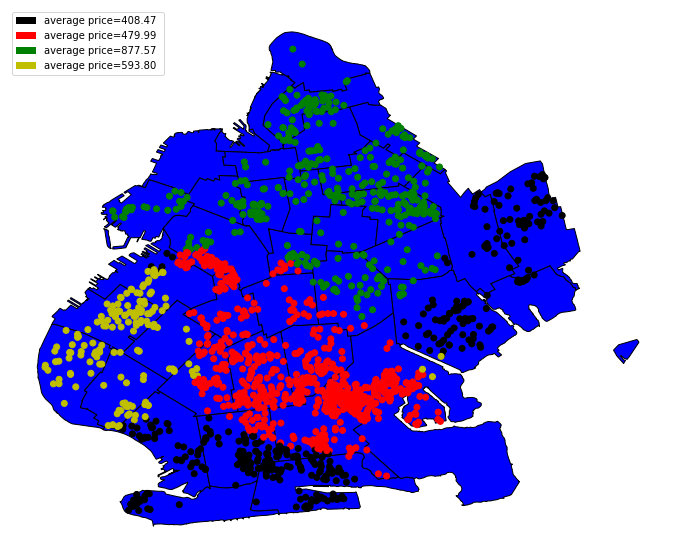

In [14]:
import matplotlib.patches as mpatches
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(20,10))
BK['geometry'].plot(ax=ax,color='b', edgecolor='black')
bk['geometry'].plot(ax=ax, c=np.array(['black', 'r', 'g','y'])[res.labels_])
LegendElement = [
                mpatches.Patch(facecolor='black', label='average price=408.47'),
                mpatches.Patch(facecolor='r', label='average price=479.99'),
                mpatches.Patch(facecolor='g', label='average price=877.57 '),
                mpatches.Patch(facecolor='y', label='average price=593.80 '),
                ]
ax.legend(handles = LegendElement, loc='upper left')
ax.axis('off')
plt.show()